Unsupervised learning is one of the major learning paradigms in machine learning and it enables us to understand the patterns and relationships in the data without the guidance of ground truths in the data. Although many of the recent breakthroughs in machine learning in the previous decades came from the supervised learning front, unsupervised learning remains one of the most promising directions that the current data science and artificial intelligence can make use of. Although, we're living in a world with abundant amounts of data, labeling them with the ground truths is not an easy task as many times this requires costly and challenging human labor to annotate them. Unsupervised learning is of primary importance for data science as it has the potential to exploit enormous amounts of data without any need for annotation.

# Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

Apply dimensionality reduction techniques to visualize the observations.
Apply clustering techniques to group together similar observations.
In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

# The Data
Looking at the (World Happiness Report)[https://www.kaggle.com/unsdsn/world-happiness], I'll see if the data can be clustered to garner additional information, potentially separating countries into level of development. 

In [106]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.cluster import MiniBatchKMeans

print('World Happiness Columns')
wh = pd.read_csv('world_happiness_2016.csv')
wh = pd.DataFrame(wh)
print(wh.columns)

World Happiness Columns
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


In [107]:
# Creating dummies for the regions, and then dropping the country and region columns.
wh = pd.concat([wh, pd.get_dummies(wh['Region'])], axis=1)
wh.drop(columns=['Country', 'Region'], inplace=True)


# Standardizing the data and creating the PCA components.
X_std = StandardScaler().fit_transform(wh)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)


[0.35687313 0.09969045]


# Dimensionality Reduction

## PCA

There isn't any visual separation for PCA, so it isn't a good dimensionality reduction method for this data.

Feature Importance:  [0.35687313 0.09969045]
Cluster Graph with PCA 


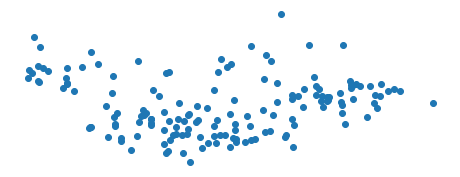

Feature Importance:  [0.35687313 0.09969045 0.08265931 0.06218788 0.05878902 0.05303271
 0.05151151 0.04989228]


array([[ 0.35859733, -0.35973754, -0.35990309, -0.359194  , -0.30731808,
        -0.28109384, -0.30452242, -0.21777439, -0.15830564, -0.06576386,
        -0.14946578, -0.07543054, -0.00189087, -0.02804026, -0.0891249 ,
        -0.00253523, -0.06872089, -0.00516748,  0.05953185,  0.24858228,
        -0.18326824],
       [ 0.04503844, -0.02985939, -0.02736842, -0.03234444, -0.09504473,
        -0.03078261, -0.09153781,  0.34186516,  0.37199284,  0.52728979,
        -0.23471301,  0.17574372, -0.35089842, -0.02346646, -0.21370366,
        -0.11961882,  0.08382636,  0.3076867 ,  0.11571693,  0.1731866 ,
         0.1700683 ]])

In [108]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)
print('Feature Importance: ', pca.explained_variance_ratio_)

print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


pca_80 = PCA(n_components=0.8)
pca_80components = pca_80.fit_transform(X_std)
print('Feature Importance: ', pca_80.explained_variance_ratio_)

pca_1 = PCA(n_components=2)
pca_2 = PCA()
pca.components_

## t-SNE

Using a perplexity of ten gives the most distinct clusters. However, there are a lot of clusters (about seven) for not a lot of data.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.003s...
[t-SNE] Computed neighbors for 157 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 1.370194
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.368645
[t-SNE] KL divergence after 300 iterations: 0.316944
Cluster Graph with t-SNE with Perplexity  10


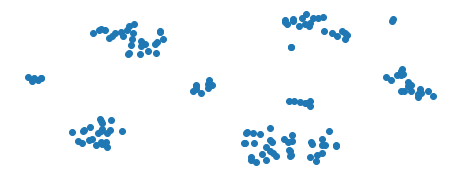

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.001s...
[t-SNE] Computed neighbors for 157 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 2.007581
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.388393
[t-SNE] KL divergence after 300 iterations: 0.347430
Cluster Graph with t-SNE with Perplexity  20


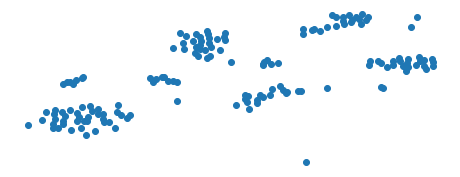

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.000s...
[t-SNE] Computed neighbors for 157 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 2.432409
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.435593
[t-SNE] KL divergence after 300 iterations: 0.289549
Cluster Graph with t-SNE with Perplexity  30


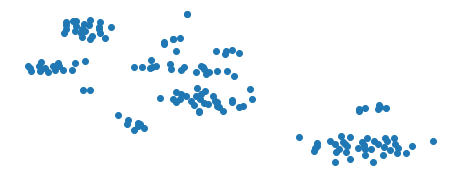

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.001s...
[t-SNE] Computed neighbors for 157 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 2.708413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.462894
[t-SNE] KL divergence after 300 iterations: 0.350802
Cluster Graph with t-SNE with Perplexity  40


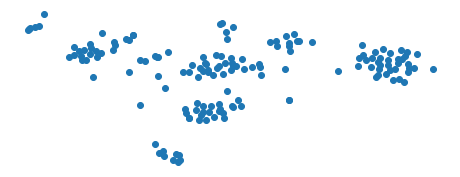

In [38]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()


## UMAP

We're able to get many distinct clusters with UMAP regardless of the parameters.

//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  5 neighbors and  0.01 minimum distance.


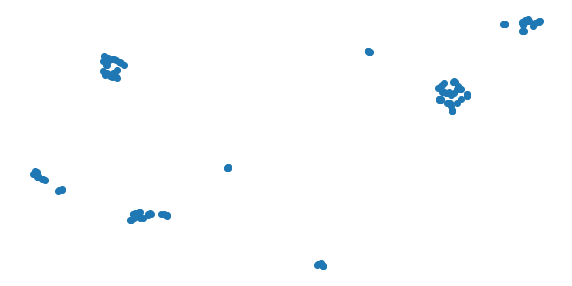

//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


UMAP with  5 neighbors and  0.1 minimum distance.


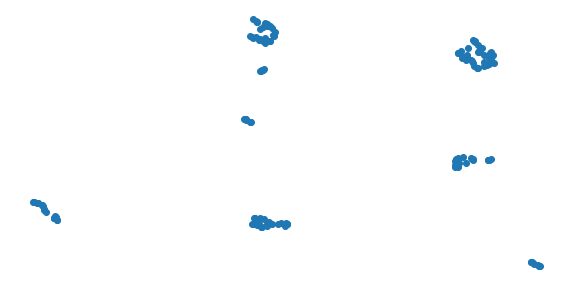



UMAP with  5 neighbors and  0.5 minimum distance.


//anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


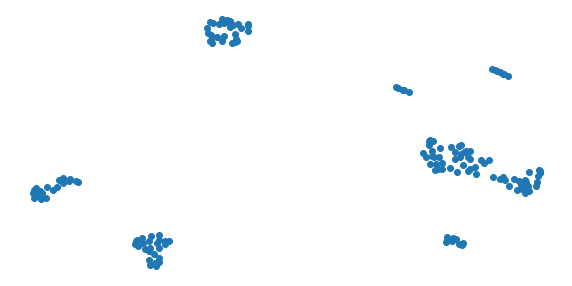



UMAP with  10 neighbors and  0.01 minimum distance.


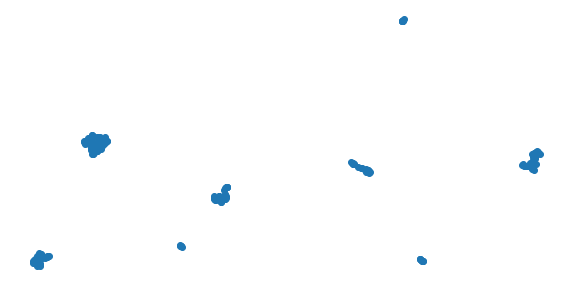



UMAP with  10 neighbors and  0.1 minimum distance.


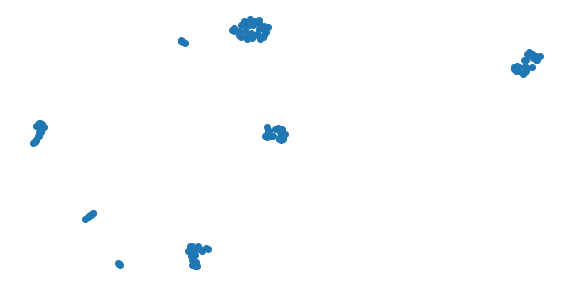



UMAP with  10 neighbors and  0.5 minimum distance.


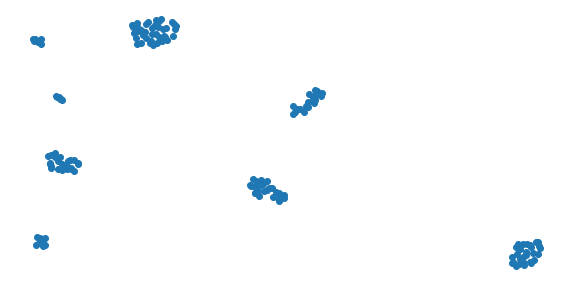



UMAP with  15 neighbors and  0.01 minimum distance.


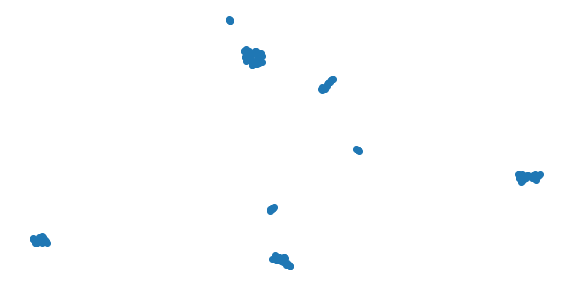



UMAP with  15 neighbors and  0.1 minimum distance.


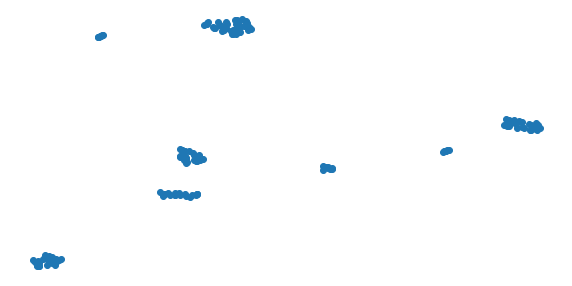



UMAP with  15 neighbors and  0.5 minimum distance.


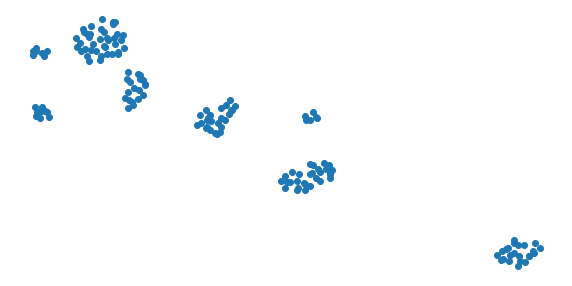



UMAP with  25 neighbors and  0.01 minimum distance.


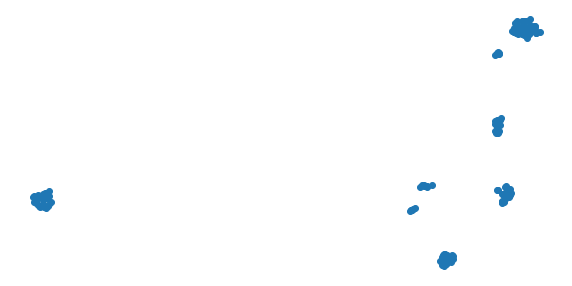



UMAP with  25 neighbors and  0.1 minimum distance.


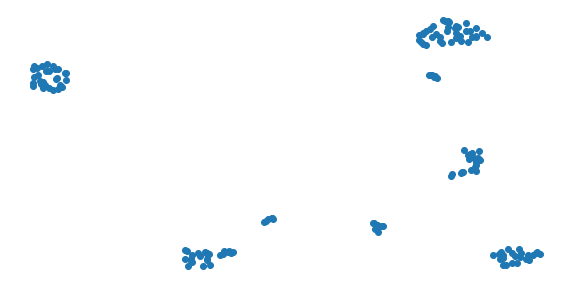



UMAP with  25 neighbors and  0.5 minimum distance.


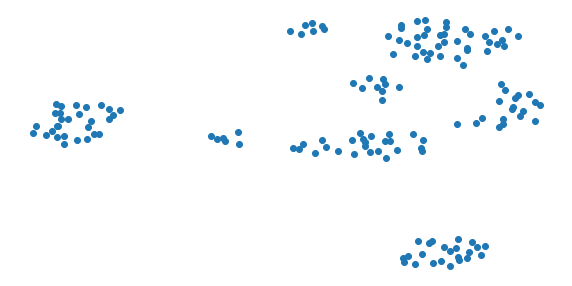

In [6]:
for n_neighbors in [5, 10, 15, 25]:
    for min_dist in [ 0.01, 0.1, 0.5]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_std)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

# Clustering

## K-Means with Standardized Variables

25.3 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


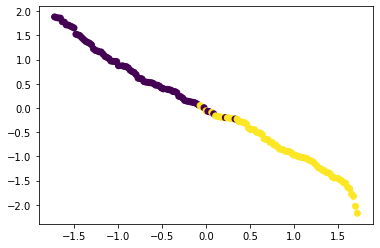

In [29]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

## K-Means with PCA Components

K-means runs most poorly with PCA, with a silhouette high of 0.47 with two clusters. This isn't surprising as using PCA for visualization also yielded poor results.

K-means with 2 clusters.
22.3 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.4683405300830295


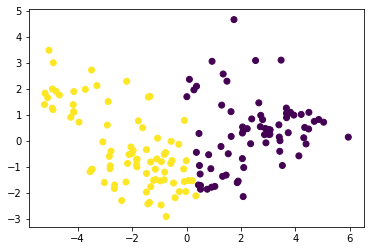



K-means with 4 clusters.
35.4 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.4289819610202532


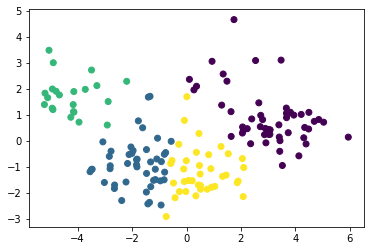



K-means with 6 clusters.
51.5 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.4335394978091852


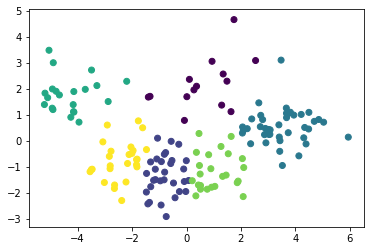



K-means with 8 clusters.
48.2 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.39581677857409847


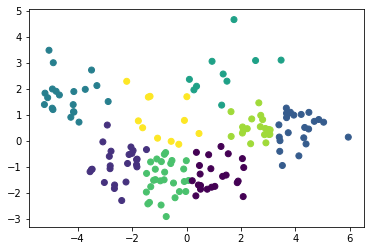

In [76]:
clusters = [2, 4, 6, 8]


for cluster in clusters:
    
    print('K-means with', cluster, 'clusters.')
    labels = KMeans(n_clusters= cluster, random_state=123).fit_predict(pca_components)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(pca_components)
    y_pred = kmeans_cluster.predict(pca_components)
#     print('ARI Score: ', metrics.adjusted_rand_score(y, y_pred))
    print('Silhouette Score: ', metrics.silhouette_score(pca_components, labels, metric='euclidean'))
    plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
    plt.show()
    print('\n')

## K-Means with t-SNE

The highest silhouette sccore is 0.718 with eight clusters.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 157 samples in 0.001s...
[t-SNE] Computed neighbors for 157 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 157 / 157
[t-SNE] Mean sigma: 1.370194
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.790009
[t-SNE] KL divergence after 300 iterations: 0.342314
K-means with 2 clusters.
26.1 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.4107256


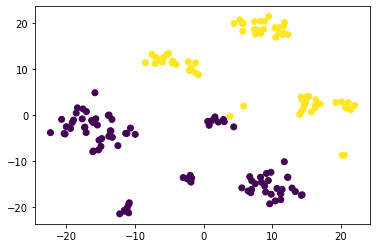



K-means with 4 clusters.
37.7 ms ± 9.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.5667498


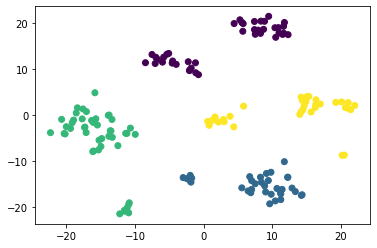



K-means with 6 clusters.
39 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.6593716


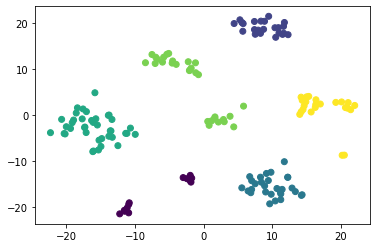



K-means with 8 clusters.
51.2 ms ± 8.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Silhouette Score:  0.71833134


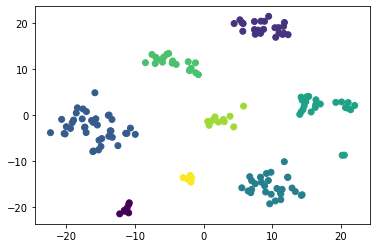

In [78]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

clusters = [2, 4, 6, 8]
for cluster in clusters:
    
    print('K-means with', cluster, 'clusters.')
    labels = KMeans(n_clusters= cluster, random_state=123).fit_predict(tsne_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(tsne_results)
    y_pred = kmeans_cluster.predict(tsne_results)
    print('Silhouette Score: ', metrics.silhouette_score(tsne_results, labels, metric='euclidean'))
    plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_pred)
    plt.show()
    print('\n')

## K-Means with UMAP

Interestingly enough, this model has the highest silhouette score of 0.80 with six clusters.

17.7 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The Silhoutte score with 2 clusters: 0.6009663343429565


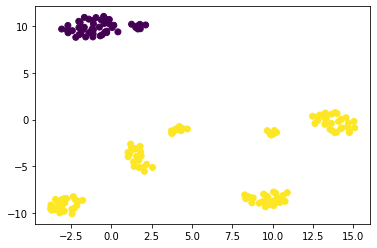



33.2 ms ± 6.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The Silhoutte score with 4 clusters: 0.735417366027832


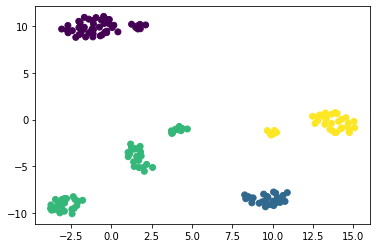



56.7 ms ± 8.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The Silhoutte score with 6 clusters: 0.8062450289726257


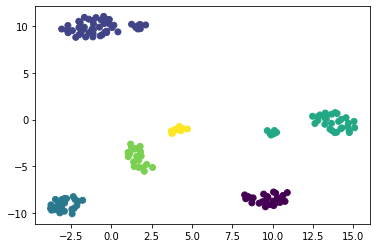



48.3 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The Silhoutte score with 8 clusters: 0.6715154051780701


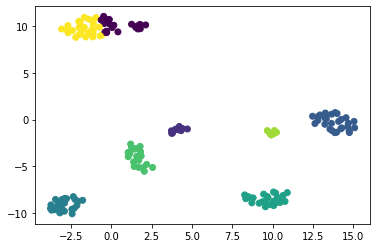

In [87]:
umap_results = umap.UMAP(n_neighbors=15,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_std)
for cluster in clusters: 
    k_means = KMeans(n_clusters=cluster, random_state=123)
    labels = KMeans(n_clusters= cluster, random_state=123).fit_predict(umap_results)
    %timeit k_means.fit(umap_results)
    y_pred = k_means.predict(umap_results)
    print('The Silhoutte score with', cluster, 'clusters: {}'.format(metrics.silhouette_score(umap_results, labels, metric='euclidean')))
    # Plot the solution.
    plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
    plt.show()
    print('\n')

## Agglomerative Hierarchical Clustering with Standardized Variables

The Silhoutte score with ward linkage and 2 clusters: 0.2200341045123847


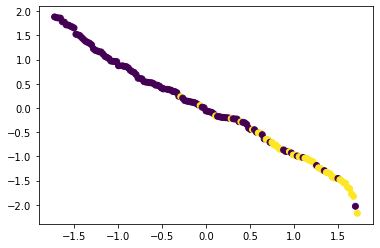



The Silhoutte score with ward linkage and 3 clusters: 0.22082988859303293


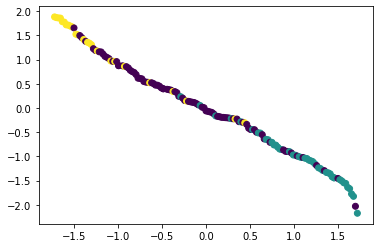



The Silhoutte score with ward linkage and 4 clusters: 0.22647734206366615


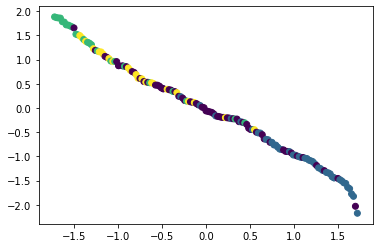



The Silhoutte score with ward linkage and 5 clusters: 0.26434598110720536


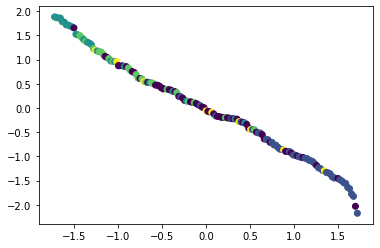



The Silhoutte score with complete linkage and 2 clusters: 0.4564317525368347


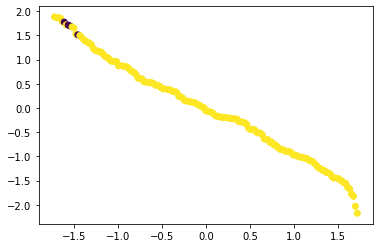



The Silhoutte score with complete linkage and 3 clusters: 0.4669482260921186


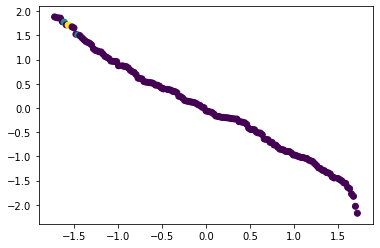



The Silhoutte score with complete linkage and 4 clusters: 0.264645834091815


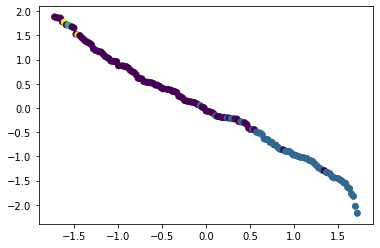



The Silhoutte score with complete linkage and 5 clusters: 0.28119312802077556


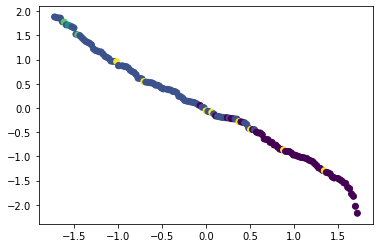



The Silhoutte score with average linkage and 2 clusters: 0.46563678736410125


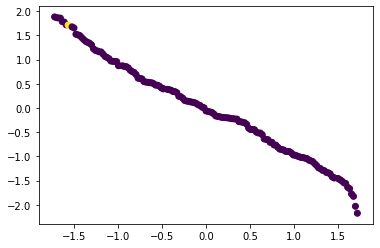



The Silhoutte score with average linkage and 3 clusters: 0.4669482260921186


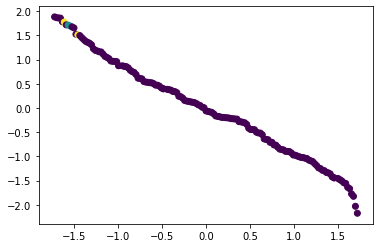



The Silhoutte score with average linkage and 4 clusters: 0.24392078957640032


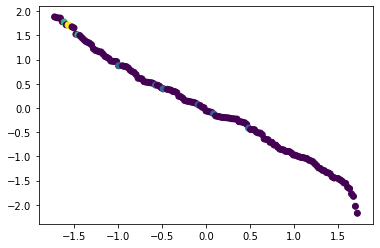



The Silhoutte score with average linkage and 5 clusters: 0.23280594283261347


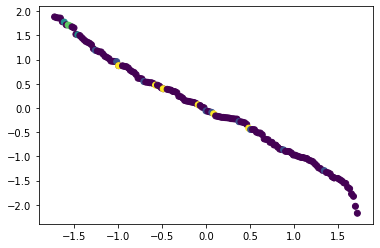

In [72]:
linkage = ['ward', 'complete', 'average']
numbers = [2, 3, 4, 5]
for link in linkage:
    for cluster in numbers:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(X_std)
        print('The Silhoutte score with', link,'linkage and', cluster, 'clusters: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        plt.scatter(X_std[:,0], X_std[:,1], c=clusters)
        plt.show()
        print('\n')


## Agglomerative Hierarchical Clustering with PCA Components

This model performs best with complete linkage and two clusters, with a high silhouette score of 0.462.

The Silhoutte score with ward linkage and 2 clusters: 0.4549595077087717


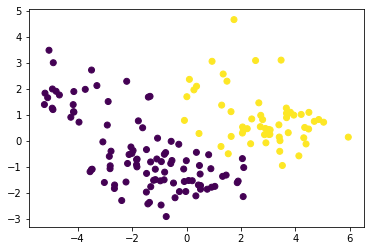



The Silhoutte score with ward linkage and 4 clusters: 0.40884032440160134


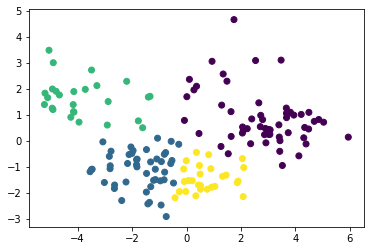



The Silhoutte score with ward linkage and 6 clusters: 0.40083394953988283


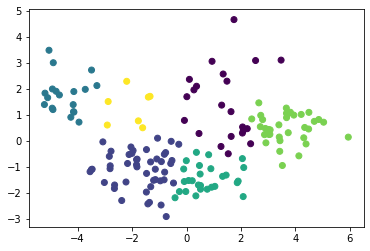



The Silhoutte score with ward linkage and 8 clusters: 0.3889726706029458


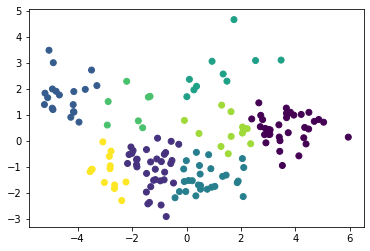



The Silhoutte score with complete linkage and 2 clusters: 0.4620600336780899


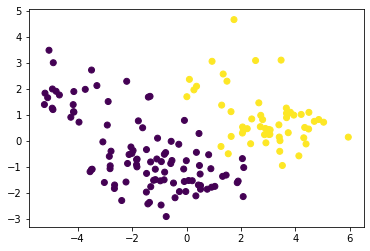



The Silhoutte score with complete linkage and 4 clusters: 0.41950486744952753


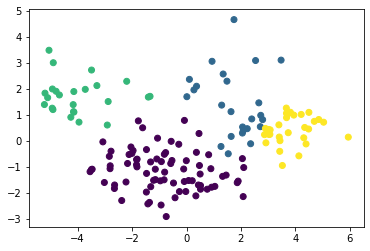



The Silhoutte score with complete linkage and 6 clusters: 0.3787365120921216


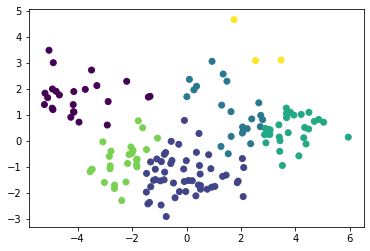



The Silhoutte score with complete linkage and 8 clusters: 0.32126445548497423


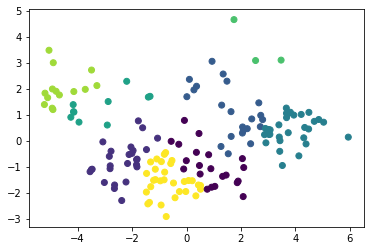



The Silhoutte score with average linkage and 2 clusters: 0.4174428942363385


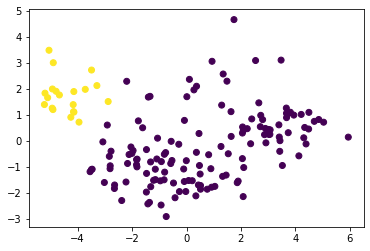



The Silhoutte score with average linkage and 4 clusters: 0.45169653259332787


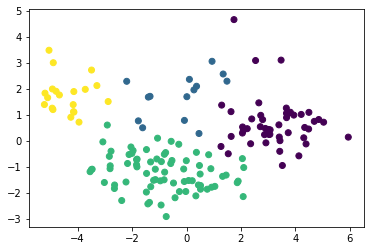



The Silhoutte score with average linkage and 6 clusters: 0.3877697851840558


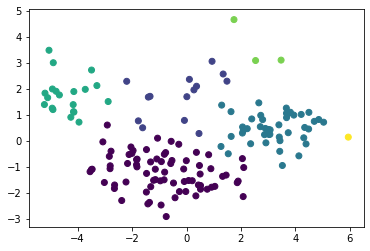



The Silhoutte score with average linkage and 8 clusters: 0.3742569862765351


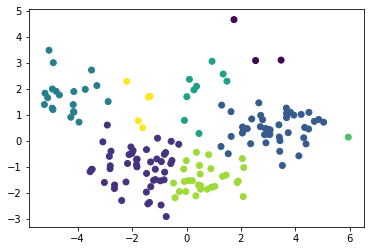

In [88]:
linkage = ['ward', 'complete', 'average']
numbers = [2, 4, 6, 8]
for link in linkage:
    for cluster in numbers:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(pca_components)
#         y_pred = 
        print('The Silhoutte score with', link,'linkage and', cluster, 'clusters: {}'.format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))
        plt.scatter(pca_components[:,0], pca_components[:,1], c=clusters)
        plt.show()
        print('\n')


## Agglomerative Hierarchical Clustering with t-SNE
 
This model performs best with complete linkage and six clusters with a silhouette score of 0.69.

The Silhoutte score with ward linkage and 2 clusters: 0.4104762077331543




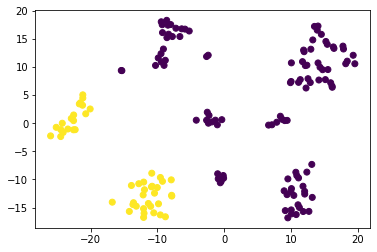

The Silhoutte score with ward linkage and 4 clusters: 0.5540509819984436




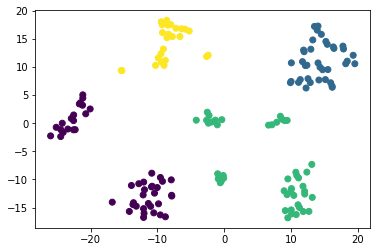

The Silhoutte score with ward linkage and 6 clusters: 0.6868389248847961




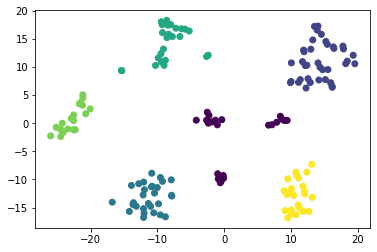

The Silhoutte score with ward linkage and 8 clusters: 0.6698713302612305




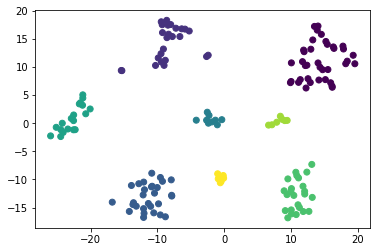

The Silhoutte score with complete linkage and 2 clusters: 0.4229831099510193




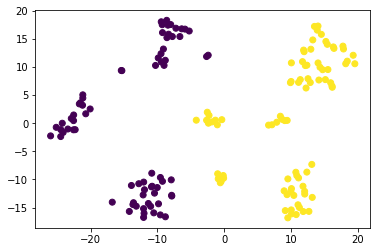

The Silhoutte score with complete linkage and 4 clusters: 0.5540509819984436




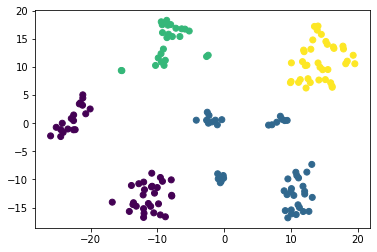

The Silhoutte score with complete linkage and 6 clusters: 0.6868389248847961




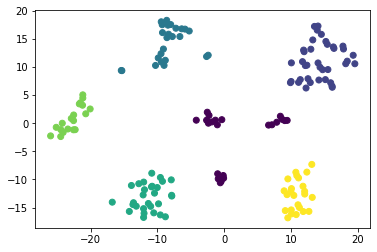

The Silhoutte score with complete linkage and 8 clusters: 0.6270197033882141




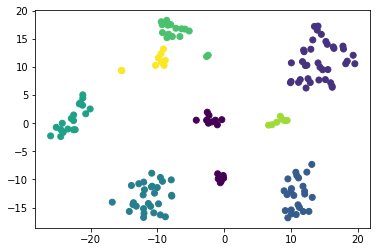

The Silhoutte score with average linkage and 2 clusters: 0.416868656873703




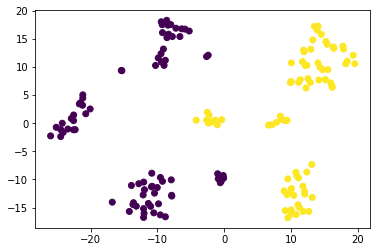

The Silhoutte score with average linkage and 4 clusters: 0.5287926197052002




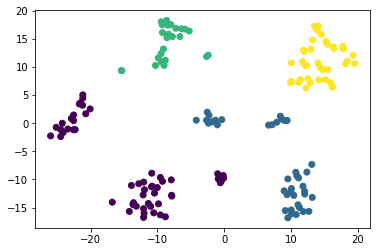

The Silhoutte score with average linkage and 6 clusters: 0.6754165887832642




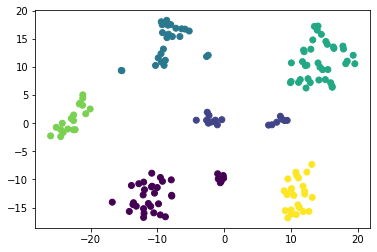

The Silhoutte score with average linkage and 8 clusters: 0.6698713302612305




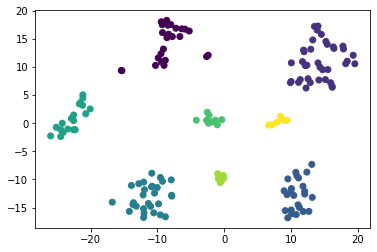

In [44]:
linkage = ['ward', 'complete', 'average']
numbers = [2, 4, 6, 8]
for link in linkage:
    for cluster in numbers:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(tsne_results)
#         y_pred = 
        print('The Silhoutte score with', link,'linkage and', cluster, 'clusters: {}'.format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))
        print('\n')
        plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)
        plt.show()

## Agglomerative Hierarchical Clustering with UMAP

While using eight clusters provides a high score, this model performs best with four clusters and either complete linkage or average linkage, with virtually identical silhouette scores of 0.756. I'm surprised by this as UMAP clearly shows eight distinct clusters, but I'm not sure what this says about the data. Perhaps that the middle clusters are more similar than the visualization shows?

The Silhoutte score with ward linkage and 2 clusters: 0.521479606628418


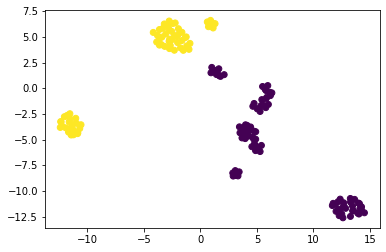



The Silhoutte score with ward linkage and 4 clusters: 0.7341023087501526


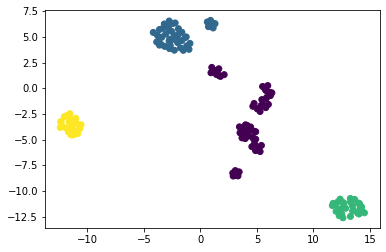



The Silhoutte score with ward linkage and 6 clusters: 0.7137058973312378


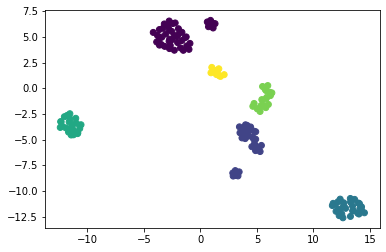



The Silhoutte score with ward linkage and 8 clusters: 0.7487911581993103


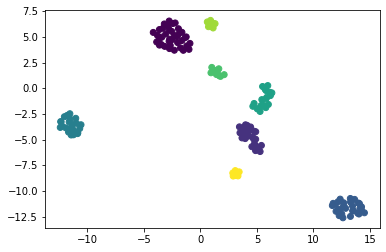



The Silhoutte score with complete linkage and 2 clusters: 0.5510098338127136


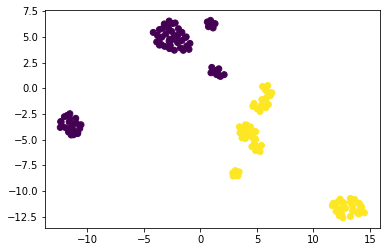



The Silhoutte score with complete linkage and 4 clusters: 0.7564635276794434


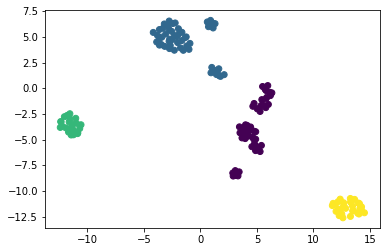



The Silhoutte score with complete linkage and 6 clusters: 0.6949385404586792


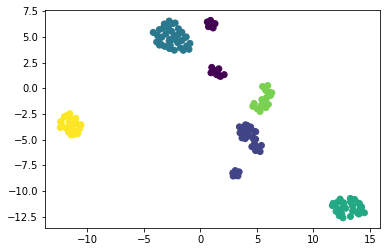



The Silhoutte score with complete linkage and 8 clusters: 0.7487911581993103


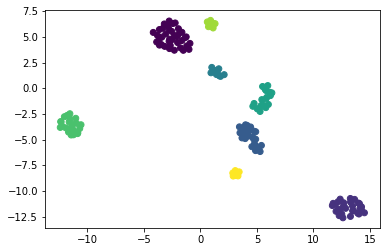



The Silhoutte score with average linkage and 2 clusters: 0.547899603843689


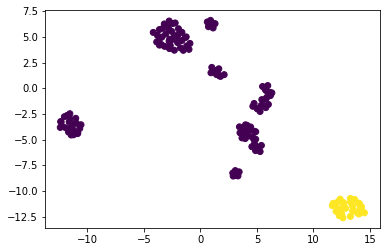



The Silhoutte score with average linkage and 4 clusters: 0.7564635276794434


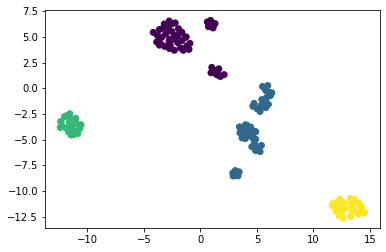



The Silhoutte score with average linkage and 6 clusters: 0.7137058973312378


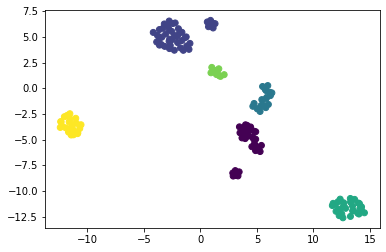



The Silhoutte score with average linkage and 8 clusters: 0.7487911581993103


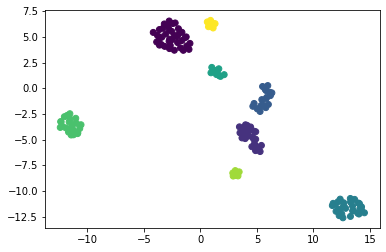

In [70]:
linkage = ['ward', 'complete', 'average']
clusters = [2, 4, 6, 8]
for link in linkage:
    for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(umap_results)
        print('The Silhoutte score with', link,'linkage and', cluster, 'clusters: {}'.format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
        plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
        plt.show()
        print('\n')


## DBSCAN with Standardized Variables

The Silhoutte score with 0.1 eps and 2 min samples: 0.296084774981816


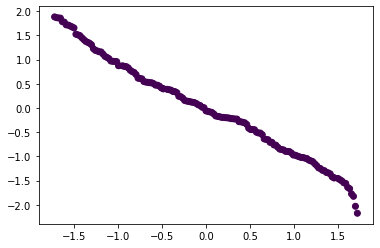



The Silhoutte score with 0.1 eps and 2 min samples: 0.296084774981816


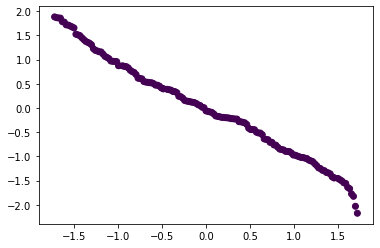



The Silhoutte score with 0.1 eps and 2 min samples: 0.296084774981816


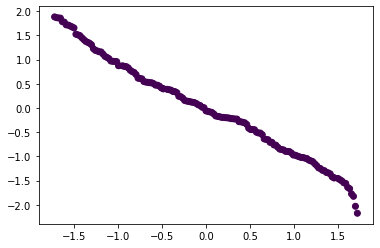



The Silhoutte score with 0.1 eps and 2 min samples: 0.296084774981816


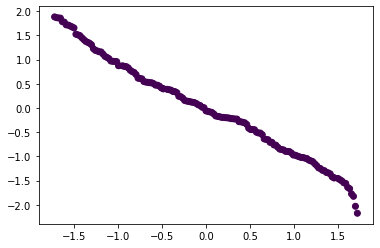



The Silhoutte score with 0.1 eps and 3 min samples: 0.296084774981816


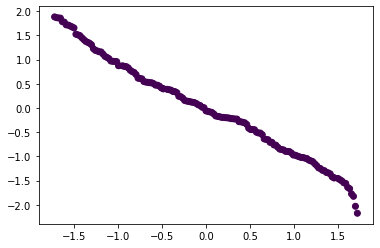



The Silhoutte score with 0.1 eps and 3 min samples: 0.296084774981816


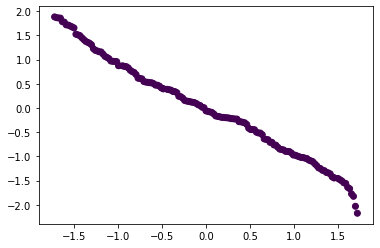



The Silhoutte score with 0.1 eps and 3 min samples: 0.296084774981816


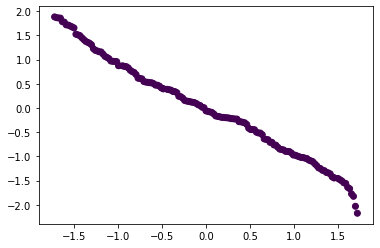



The Silhoutte score with 0.1 eps and 3 min samples: 0.296084774981816


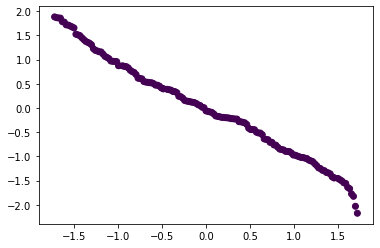



The Silhoutte score with 0.5 eps and 2 min samples: 0.296084774981816


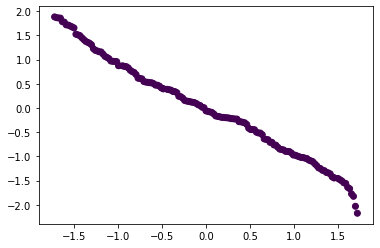



The Silhoutte score with 0.5 eps and 2 min samples: 0.296084774981816


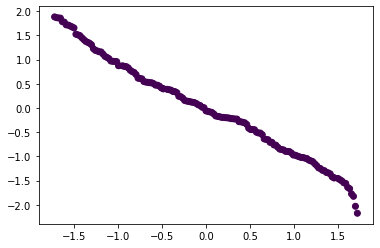



The Silhoutte score with 0.5 eps and 2 min samples: 0.296084774981816


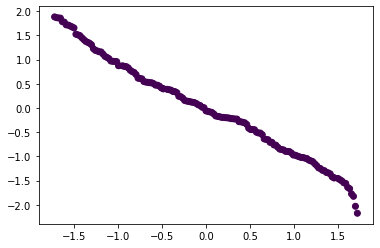



The Silhoutte score with 0.5 eps and 2 min samples: 0.296084774981816


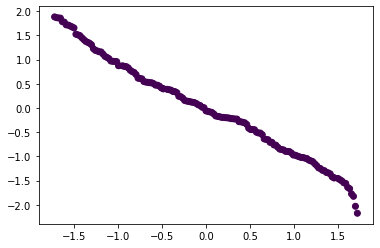



The Silhoutte score with 0.5 eps and 3 min samples: 0.296084774981816


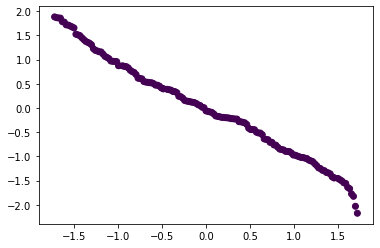



The Silhoutte score with 0.5 eps and 3 min samples: 0.296084774981816


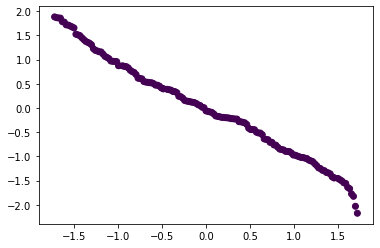



The Silhoutte score with 0.5 eps and 3 min samples: 0.296084774981816


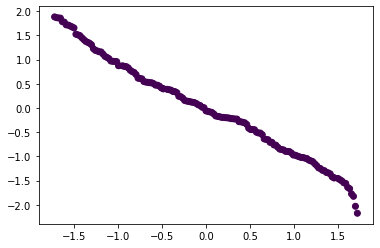



The Silhoutte score with 0.5 eps and 3 min samples: 0.296084774981816


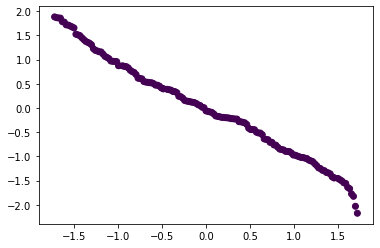



The Silhoutte score with 1 eps and 2 min samples: 0.296084774981816


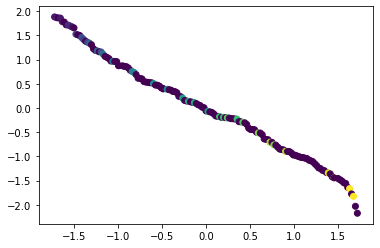



The Silhoutte score with 1 eps and 2 min samples: 0.296084774981816


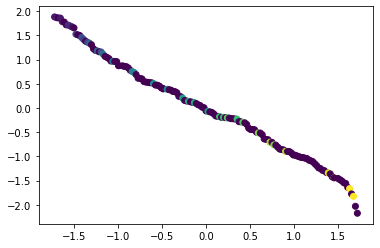



The Silhoutte score with 1 eps and 2 min samples: 0.296084774981816


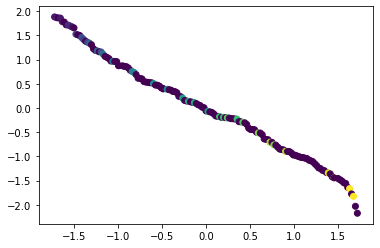



The Silhoutte score with 1 eps and 2 min samples: 0.296084774981816


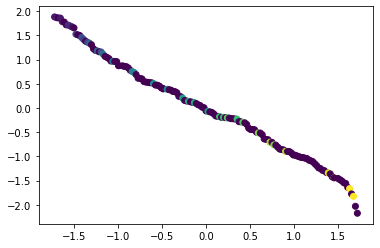



The Silhoutte score with 1 eps and 3 min samples: 0.296084774981816


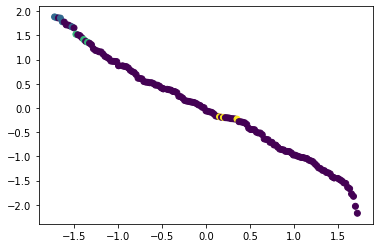



The Silhoutte score with 1 eps and 3 min samples: 0.296084774981816


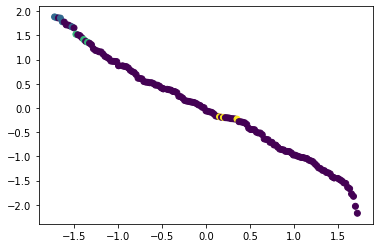



The Silhoutte score with 1 eps and 3 min samples: 0.296084774981816


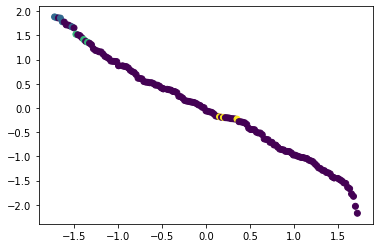



The Silhoutte score with 1 eps and 3 min samples: 0.296084774981816


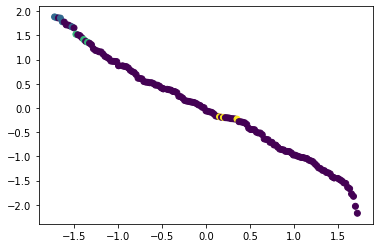



The Silhoutte score with 2 eps and 2 min samples: 0.296084774981816


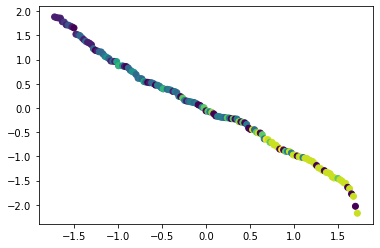



The Silhoutte score with 2 eps and 2 min samples: 0.296084774981816


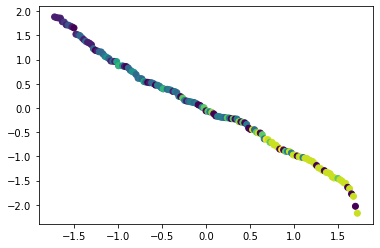



The Silhoutte score with 2 eps and 2 min samples: 0.296084774981816


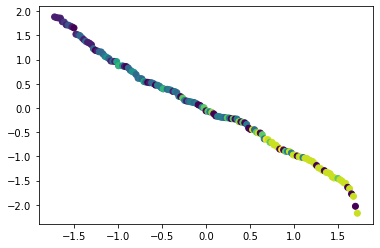



The Silhoutte score with 2 eps and 2 min samples: 0.296084774981816


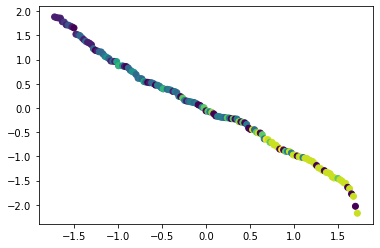



The Silhoutte score with 2 eps and 3 min samples: 0.296084774981816


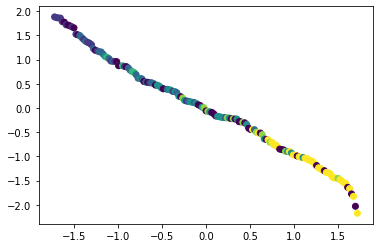



The Silhoutte score with 2 eps and 3 min samples: 0.296084774981816


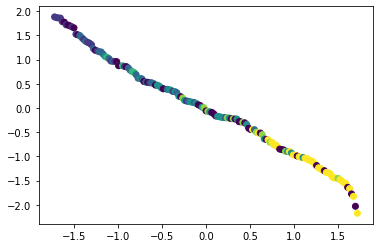



The Silhoutte score with 2 eps and 3 min samples: 0.296084774981816


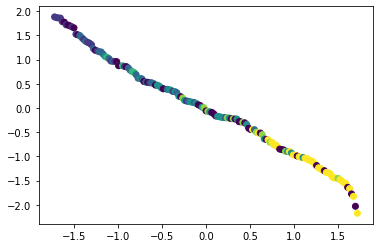



The Silhoutte score with 2 eps and 3 min samples: 0.296084774981816


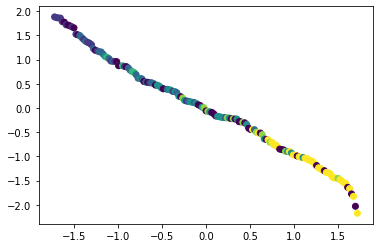



The Silhoutte score with 5 eps and 2 min samples: 0.296084774981816


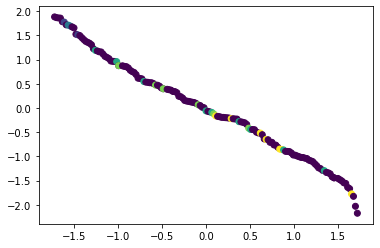



The Silhoutte score with 5 eps and 2 min samples: 0.296084774981816


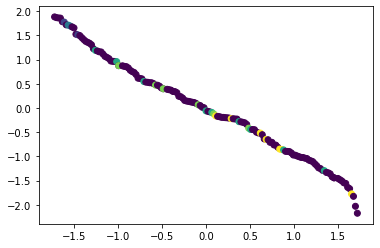



The Silhoutte score with 5 eps and 2 min samples: 0.296084774981816


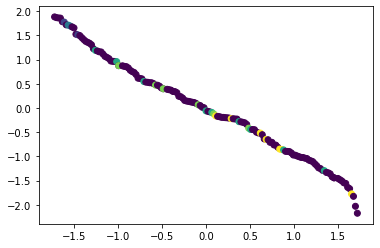



The Silhoutte score with 5 eps and 2 min samples: 0.296084774981816


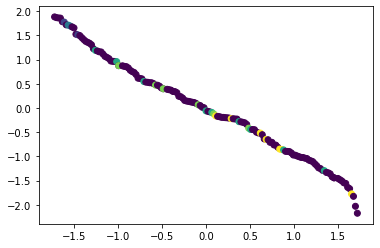



The Silhoutte score with 5 eps and 3 min samples: 0.296084774981816


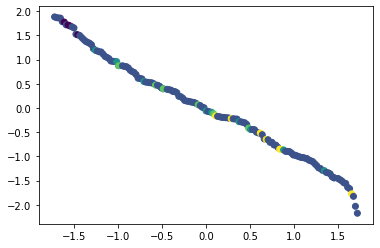



The Silhoutte score with 5 eps and 3 min samples: 0.296084774981816


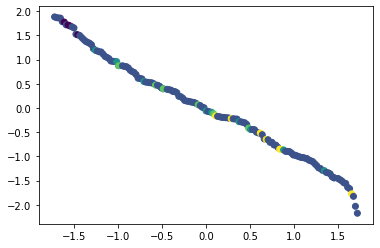



The Silhoutte score with 5 eps and 3 min samples: 0.296084774981816


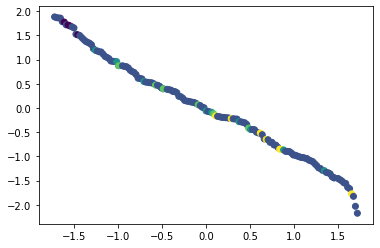



The Silhoutte score with 5 eps and 3 min samples: 0.296084774981816


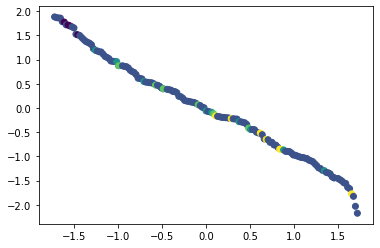

In [91]:
eps = [0.1, 0.5, 1, 2, 5]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        for cluster in numbers:
            dbscan_cluster = DBSCAN(eps=ep, min_samples=min_sample)
            clusters = dbscan_cluster.fit_predict(X_std)
            print('The Silhoutte score with', ep,'eps and', min_sample, 'min samples: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
            plt.scatter(X_std[:,0], X_std[:,1], c=clusters)
            plt.show()
            print('\n')


## DBSCAN with PCA Components

In line with all other models using PCA, this model performs terribly with a high silhouette score of 0.309 with one eps a three minimum samples.

0.1 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: -0.4632605152123754


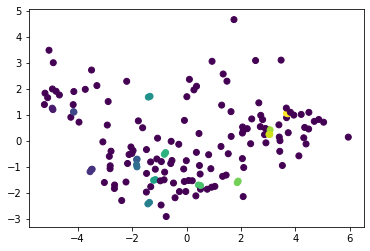



0.1 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.04616892235739339


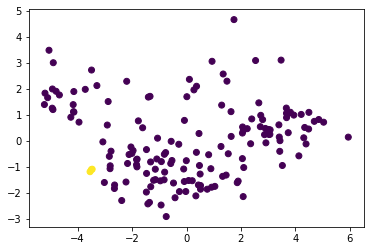



0.5 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.12270592642946022


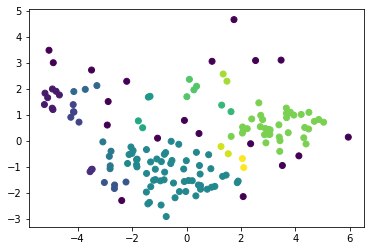



0.5 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.23132896535313568


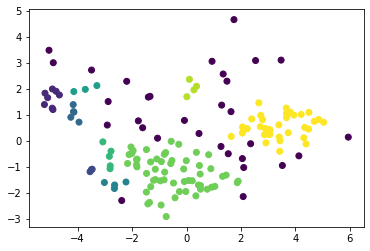



1 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.04139095562743282


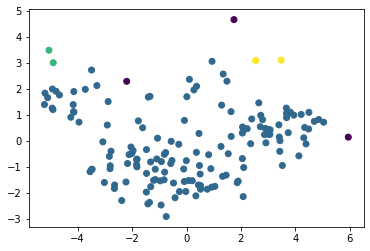



1 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.3086509567670052


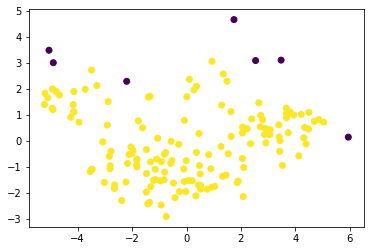



2 eps and 2 min samples.


---------------------------------------------------
DBSCAN with 2 eps and 2 min samples was unable to find any clusters.
---------------------------------------------------


2 eps and 3 min samples.


---------------------------------------------------
DBSCAN with 2 eps and 3 min samples was unable to find any clusters.
---------------------------------------------------


5 eps and 2 min samples.


---------------------------------------------------
DBSCAN with 5 eps and 2 min samples was unable to find any clusters.
---------------------------------------------------


5 eps and 3 min samples.


---------------------------------------------------
DBSCAN with 5 eps and 3 min samples was unable to find any clusters.
---------------------------------------------------




In [103]:
eps = [0.1, 0.5, 1, 2, 5]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        print(ep, 'eps and', min_sample, 'min samples.')
        dbscan_cluster = DBSCAN(eps=ep, min_samples=min_sample)
        clusters = dbscan_cluster.fit_predict(pca_components) 
        try: 
            print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))
            plt.scatter(pca_components[:,0], pca_components[:,1], c=clusters)
            plt.show()
            print('\n')
        except ValueError:
            print('\n')
            print('---------------------------------------------------')
            print('DBSCAN with', ep, 'eps and', min_sample, 'min samples was unable to find any clusters.')
            print('---------------------------------------------------')
            print('\n')

## DBSCAN with t-SNE

The silhouette score for this model increases as the eps increases, with a high of 0.717 at with an eps of five.

0.1 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: -0.03610922023653984


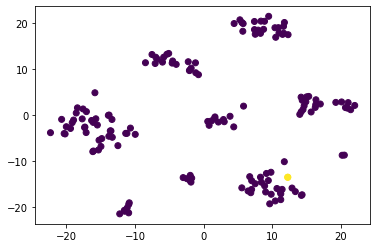



0.1 eps and 3 min samples.


---------------------------------------------------
DBSCAN with 0.1 eps and 3 min samples was unable to find any clusters.
---------------------------------------------------


0.5 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: -0.3625713884830475


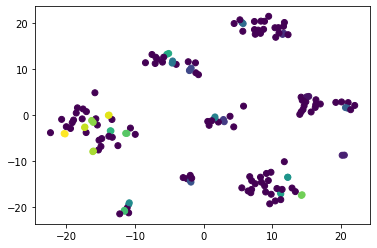



0.5 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: -0.13267086446285248


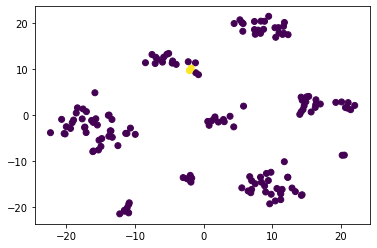



1 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.32466012239456177


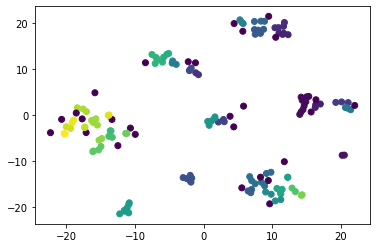



1 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.020576177164912224


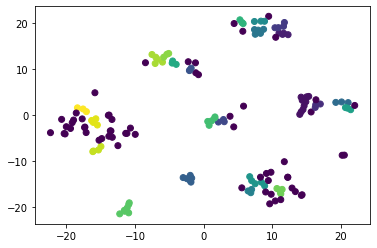



2 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.5323421955108643


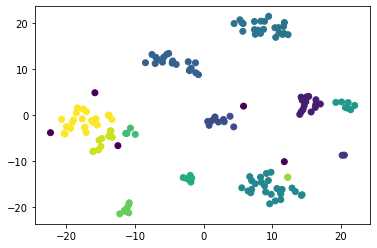



2 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.5870476365089417


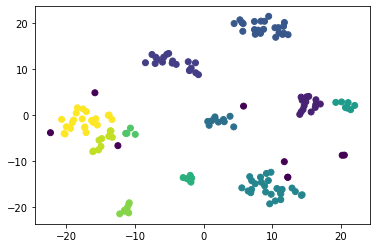



5 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.7174249291419983


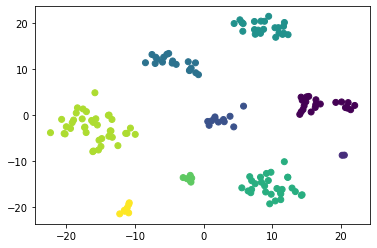



5 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.7174249291419983


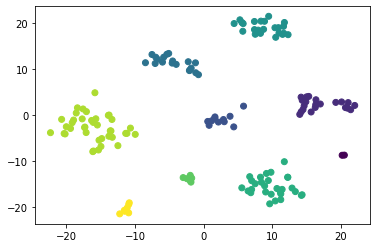

In [97]:
eps = [0.1, 0.5, 1, 2, 5]
min_samples = [2, 3]

for ep in eps:
    for min_sample in min_samples:
        print(ep, 'eps and', min_sample, 'min samples.')
        dbscan_cluster = DBSCAN(eps=ep, min_samples=min_sample)
        clusters = dbscan_cluster.fit_predict(tsne_results)
        try: 
            print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))
            plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)
            plt.show()
            print('\n')
        except ValueError:
            print('\n')
            print('---------------------------------------------------')
            print('DBSCAN with', ep, 'eps and', min_sample, 'min samples was unable to find any clusters.')
            print('---------------------------------------------------')
            print('\n')

## DBSCAN with UMAP

This model performs best with a high silhouette score of 0.797 with an eps of two regardless of minimum samples.

0.1 eps and 2 min samples.
The silhoutte score of the GMM solution: -0.24294449388980865


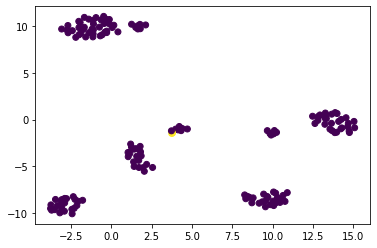



0.1 eps and 3 min samples.


---------------------------------------------------
DBSCAN with 0.1 eps and 3 min samples was unable to find any clusters.
---------------------------------------------------


0.1 eps and 4 min samples.


---------------------------------------------------
DBSCAN with 0.1 eps and 4 min samples was unable to find any clusters.
---------------------------------------------------


0.5 eps and 2 min samples.
The silhoutte score of the GMM solution: 0.3632919490337372


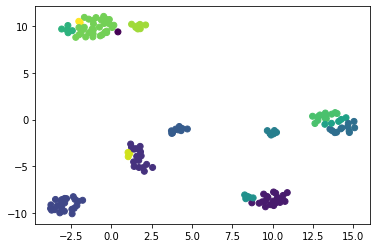



0.5 eps and 3 min samples.
The silhoutte score of the GMM solution: 0.40669599175453186


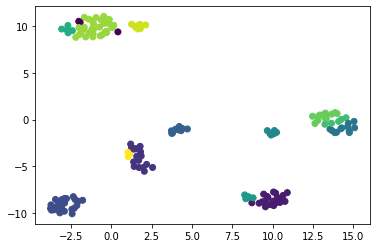



0.5 eps and 4 min samples.
The silhoutte score of the GMM solution: 0.31870293617248535


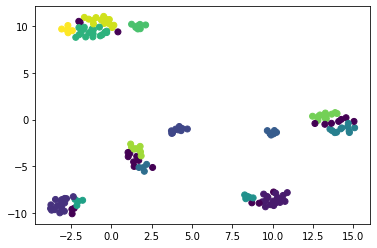



1 eps and 2 min samples.
The silhoutte score of the GMM solution: 0.7043986320495605


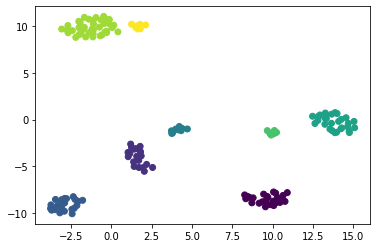



1 eps and 3 min samples.
The silhoutte score of the GMM solution: 0.7043986320495605


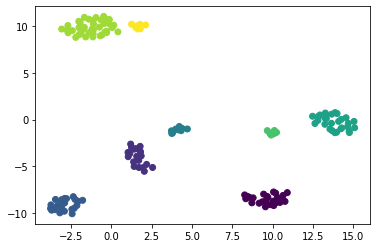



1 eps and 4 min samples.
The silhoutte score of the GMM solution: 0.7043986320495605


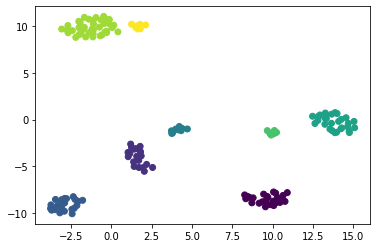



2 eps and 2 min samples.
The silhoutte score of the GMM solution: 0.7973909974098206


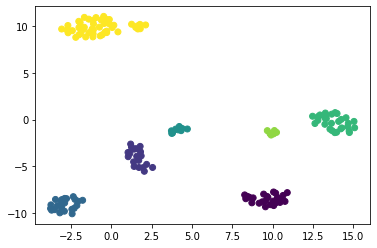



2 eps and 3 min samples.
The silhoutte score of the GMM solution: 0.7973909974098206


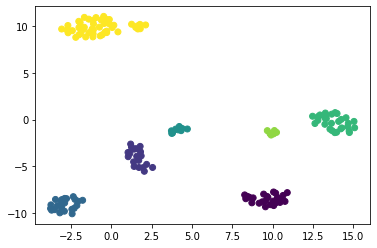



2 eps and 4 min samples.
The silhoutte score of the GMM solution: 0.7973909974098206


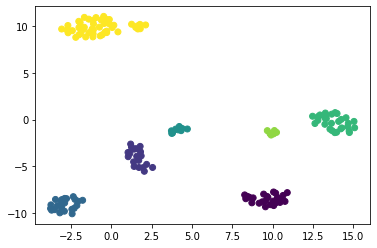



5 eps and 2 min samples.
The silhoutte score of the GMM solution: 0.4463494122028351


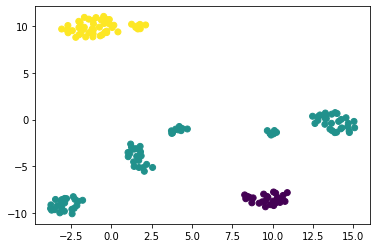



5 eps and 3 min samples.
The silhoutte score of the GMM solution: 0.4463494122028351


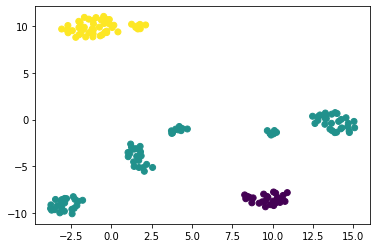



5 eps and 4 min samples.
The silhoutte score of the GMM solution: 0.4463494122028351


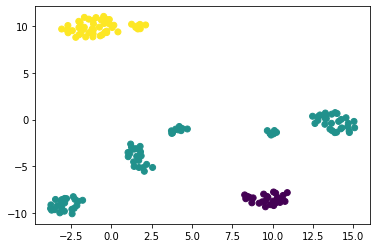

In [104]:
eps = [0.1, 0.5, 1, 2, 5]
min_samples = [2, 3, 4]

for ep in eps:
    for min_sample in min_samples:
        print(ep, 'eps and', min_sample, 'min samples.')
        dbscan_cluster = DBSCAN(eps=ep, min_samples=min_sample)
        clusters = dbscan_cluster.fit_predict(umap_results)
        try: 
            print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
            plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
            plt.show()
            print('\n')
        except ValueError:
            print('\n')
            print('---------------------------------------------------')
            print('DBSCAN with', ep, 'eps and', min_sample, 'min samples was unable to find any clusters.')
            print('---------------------------------------------------')
            print('\n')
            
            

## GMM

GMM with full covariance type and 2 components.
The silhoutte score of the GMM solution: 0.2038365409084536


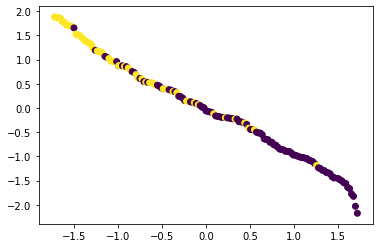



GMM with full covariance type and 3 components.
The silhoutte score of the GMM solution: 0.19423982512878335


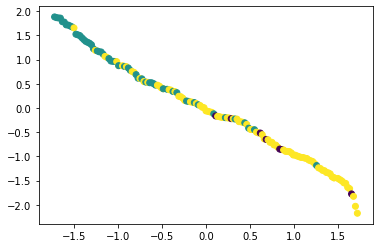



GMM with full covariance type and 4 components.
The silhoutte score of the GMM solution: 0.1716902118877123


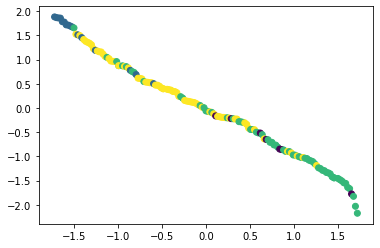



GMM with tied covariance type and 2 components.
The silhoutte score of the GMM solution: 0.2200341045123847


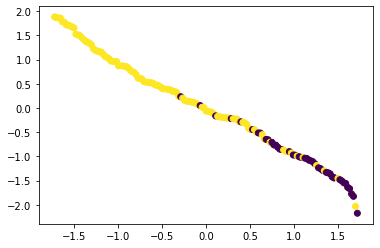



GMM with tied covariance type and 3 components.
The silhoutte score of the GMM solution: 0.21822591883450257


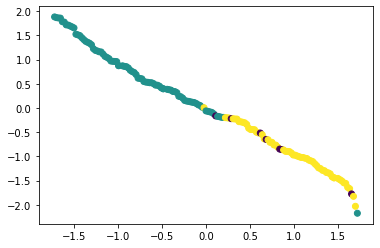



GMM with tied covariance type and 4 components.
The silhoutte score of the GMM solution: 0.23295895506232198


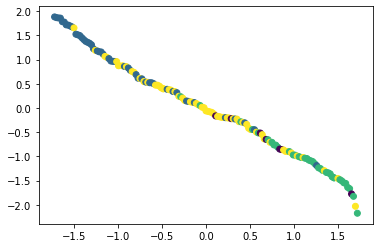



GMM with diag covariance type and 2 components.
The silhoutte score of the GMM solution: 0.2038365409084536


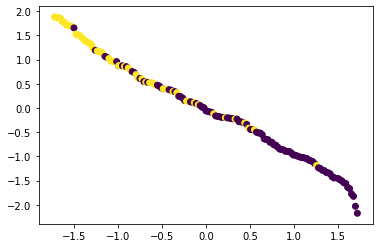



GMM with diag covariance type and 3 components.
The silhoutte score of the GMM solution: 0.19423982512878335


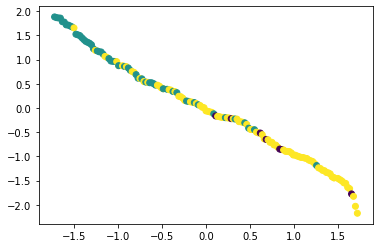



GMM with diag covariance type and 4 components.
The silhoutte score of the GMM solution: 0.24313000319296216


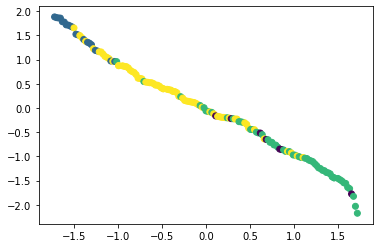



GMM with spherical covariance type and 2 components.
The silhoutte score of the GMM solution: 0.18690513105287465


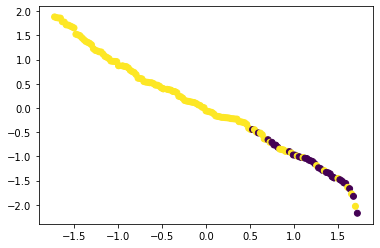



GMM with spherical covariance type and 3 components.
The silhoutte score of the GMM solution: 0.21995493804106137


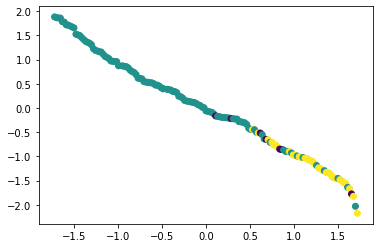



GMM with spherical covariance type and 4 components.
The silhoutte score of the GMM solution: 0.19780653892624456


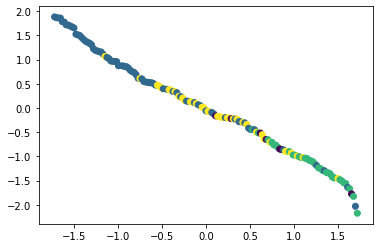

In [66]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(X_std)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        plt.scatter(X_std[:,0], X_std[:,1], c=clusters)
        plt.show()
        print('\n')

## GMM with PCA Components

Unsurprisingly, GMM performs poorly with PCA - however, the highest silhouette score of 0.473 with full covariance and two components which is interesting because the model performs highest with four components with the other dimensionality reduction techniques.

GMM with full covariance type and 2 components.
The silhoutte score of the GMM solution: 0.47343882576271057


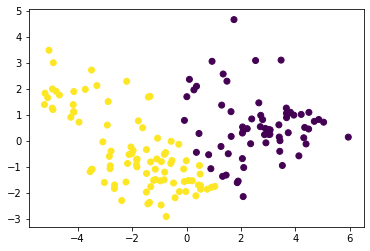



GMM with full covariance type and 4 components.
The silhoutte score of the GMM solution: 0.47445032090778044


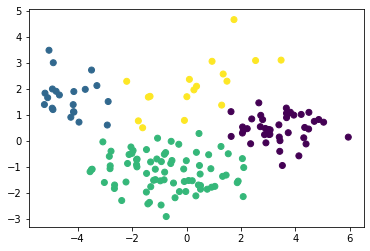



GMM with full covariance type and 6 components.
The silhoutte score of the GMM solution: 0.32233896958302627


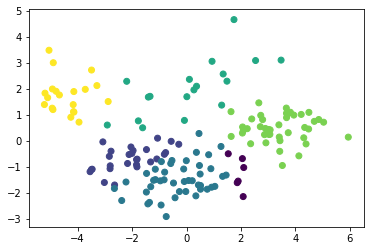



GMM with full covariance type and 8 components.
The silhoutte score of the GMM solution: 0.33193390060002853


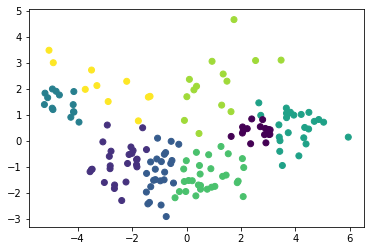



GMM with tied covariance type and 2 components.
The silhoutte score of the GMM solution: 0.46467734004470634


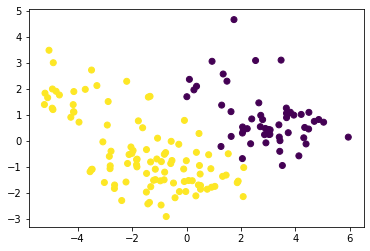



GMM with tied covariance type and 4 components.
The silhoutte score of the GMM solution: 0.4626449079819478


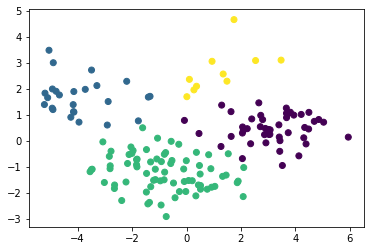



GMM with tied covariance type and 6 components.
The silhoutte score of the GMM solution: 0.36197804619028745


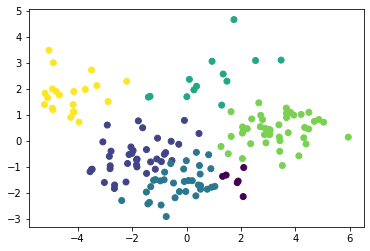



GMM with tied covariance type and 8 components.
The silhoutte score of the GMM solution: 0.39159984999013536


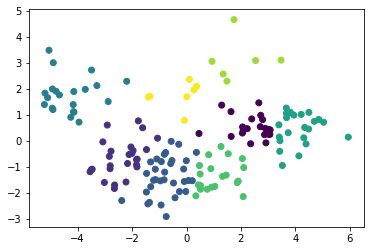



GMM with diag covariance type and 2 components.
The silhoutte score of the GMM solution: 0.40471136342519864


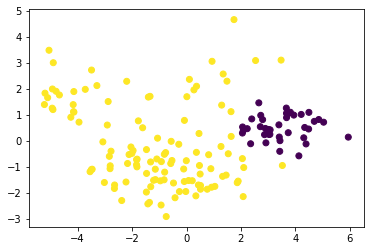



GMM with diag covariance type and 4 components.
The silhoutte score of the GMM solution: 0.46972330612203467


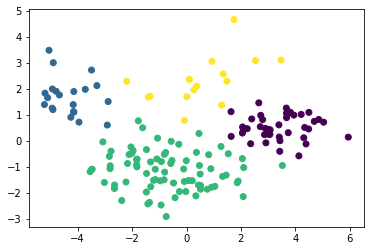



GMM with diag covariance type and 6 components.
The silhoutte score of the GMM solution: 0.3873032836875737


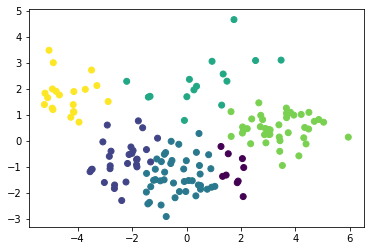



GMM with diag covariance type and 8 components.
The silhoutte score of the GMM solution: 0.36432490322117145


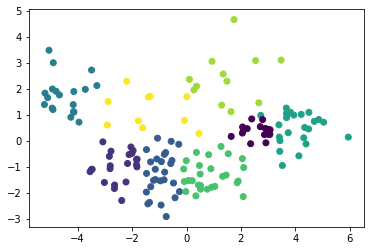



GMM with spherical covariance type and 2 components.
The silhoutte score of the GMM solution: 0.4260596814894379


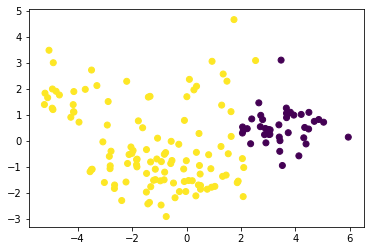



GMM with spherical covariance type and 4 components.
The silhoutte score of the GMM solution: 0.46558482673753426


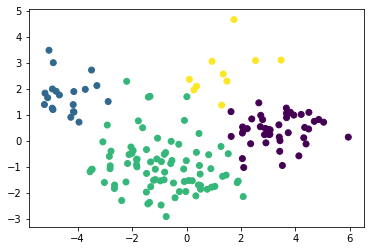



GMM with spherical covariance type and 6 components.
The silhoutte score of the GMM solution: 0.4079634549026515


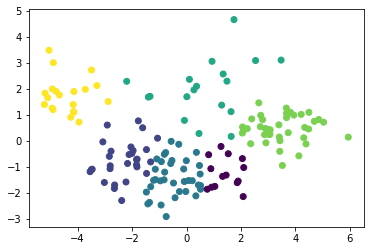



GMM with spherical covariance type and 8 components.
The silhoutte score of the GMM solution: 0.38350404507031444


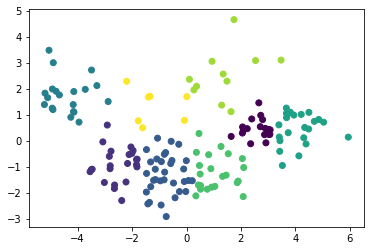

In [100]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 4, 6, 8]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(pca_components)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))
        plt.scatter(pca_components[:,0], pca_components[:,1], c=clusters)
        plt.show()
        print('\n')

## GMM with t-SNE

This model performs best with four components and either diagonal covariance or full covariance with a silhouette of 0.506.

GMM with full covariance type and 2 components.
The silhoutte score of the GMM solution: 0.44108259677886963




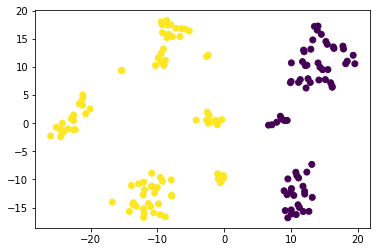

GMM with full covariance type and 3 components.
The silhoutte score of the GMM solution: 0.43643850088119507




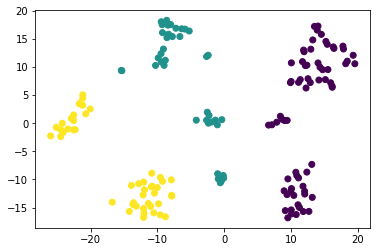

GMM with full covariance type and 4 components.
The silhoutte score of the GMM solution: 0.5056899189949036




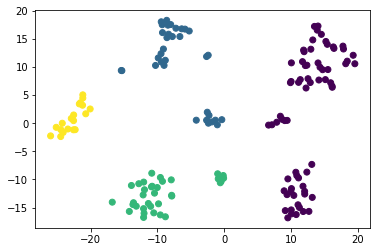

GMM with tied covariance type and 2 components.
The silhoutte score of the GMM solution: 0.42989295721054077




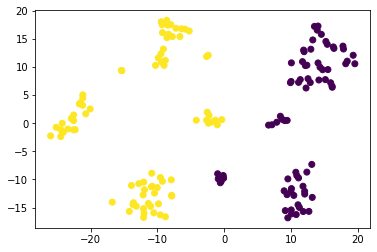

GMM with tied covariance type and 3 components.
The silhoutte score of the GMM solution: 0.37217360734939575




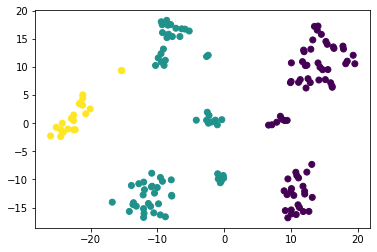

GMM with tied covariance type and 4 components.
The silhoutte score of the GMM solution: 0.4995470941066742




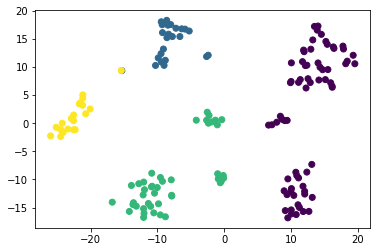

GMM with diag covariance type and 2 components.
The silhoutte score of the GMM solution: 0.44108259677886963




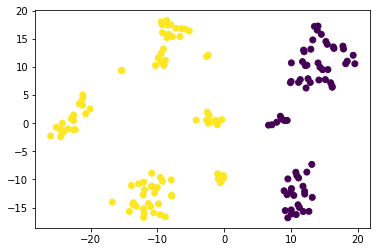

GMM with diag covariance type and 3 components.
The silhoutte score of the GMM solution: 0.4296603798866272




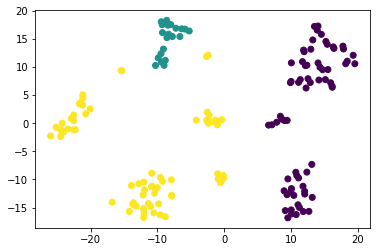

GMM with diag covariance type and 4 components.
The silhoutte score of the GMM solution: 0.5056899189949036




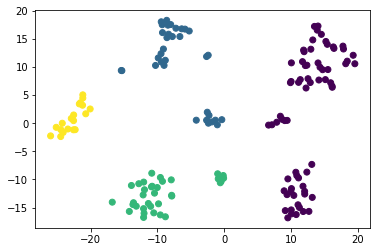

GMM with spherical covariance type and 2 components.
The silhoutte score of the GMM solution: 0.44108259677886963




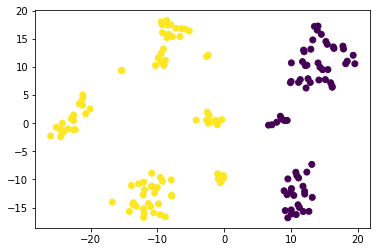

GMM with spherical covariance type and 3 components.
The silhoutte score of the GMM solution: 0.4292627274990082




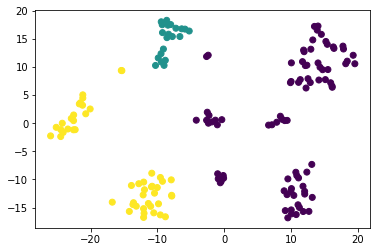

GMM with spherical covariance type and 4 components.
The silhoutte score of the GMM solution: 0.46394801139831543




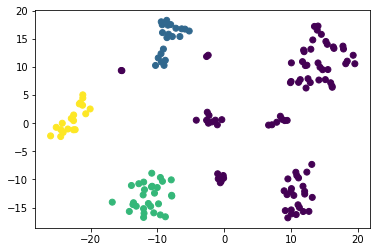

In [61]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(tsne_results)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))
        plt.scatter(tsne_results[:,0], tsne_results[:,1], c=clusters)
        plt.show()
        print('\n')

## GMM with UMAP

This model performs best with four components with a silhouette score around 0.735, regardless of what type of covariance is used.

GMM with full covariance type and 2 components.
The silhoutte score of the GMM solution: 0.6009663343429565


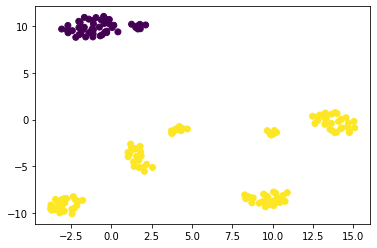



GMM with full covariance type and 4 components.
The silhoutte score of the GMM solution: 0.735417366027832


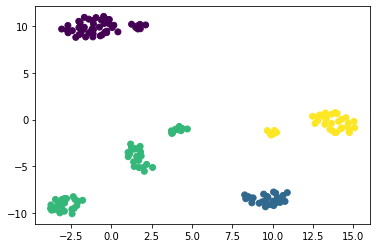



GMM with full covariance type and 6 components.
The silhoutte score of the GMM solution: 0.7112341523170471


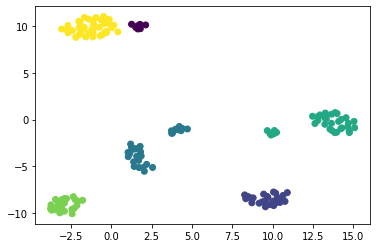



GMM with full covariance type and 8 components.
The silhoutte score of the GMM solution: 0.7043986320495605


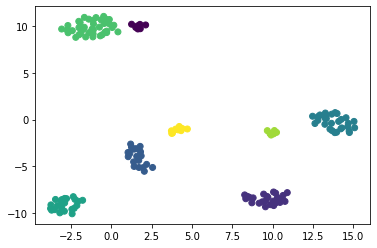



GMM with tied covariance type and 2 components.
The silhoutte score of the GMM solution: 0.6009663343429565


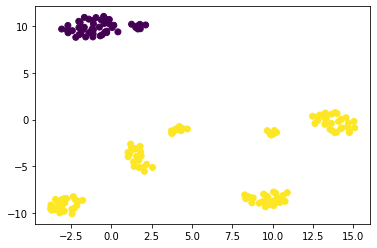



GMM with tied covariance type and 4 components.
The silhoutte score of the GMM solution: 0.735417366027832


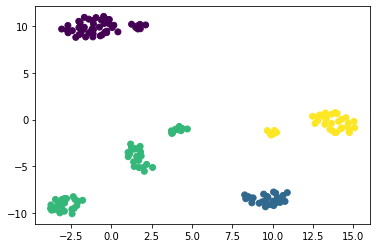



GMM with tied covariance type and 6 components.
The silhoutte score of the GMM solution: 0.7066380381584167


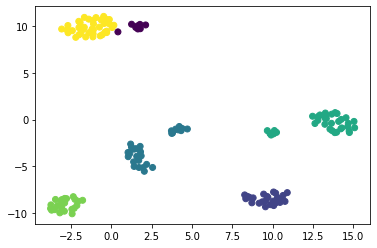



GMM with tied covariance type and 8 components.
The silhoutte score of the GMM solution: 0.6998024582862854


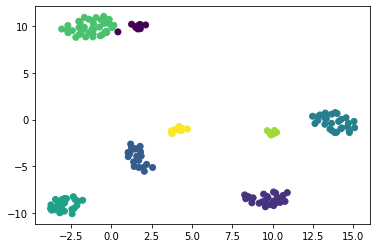



GMM with diag covariance type and 2 components.
The silhoutte score of the GMM solution: 0.6009663343429565


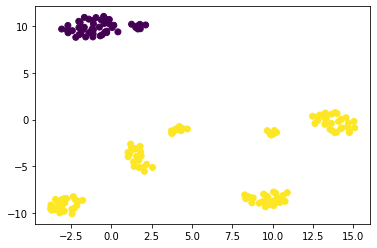



GMM with diag covariance type and 4 components.
The silhoutte score of the GMM solution: 0.735417366027832


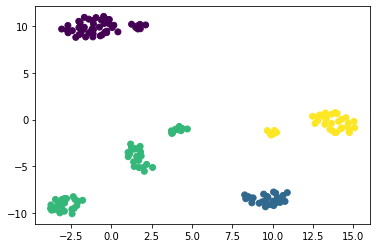



GMM with diag covariance type and 6 components.
The silhoutte score of the GMM solution: 0.7112341523170471


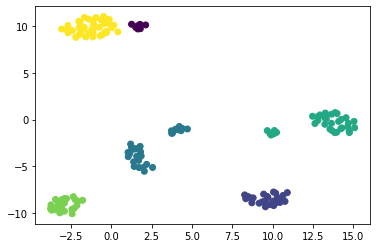



GMM with diag covariance type and 8 components.
The silhoutte score of the GMM solution: 0.7043986320495605


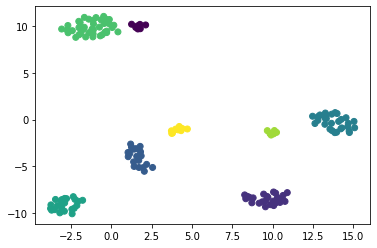



GMM with spherical covariance type and 2 components.
The silhoutte score of the GMM solution: 0.6009663343429565


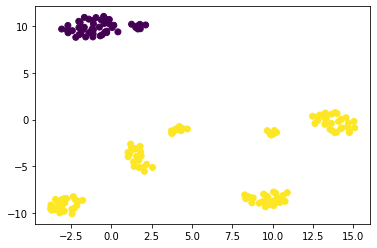



GMM with spherical covariance type and 4 components.
The silhoutte score of the GMM solution: 0.735417366027832


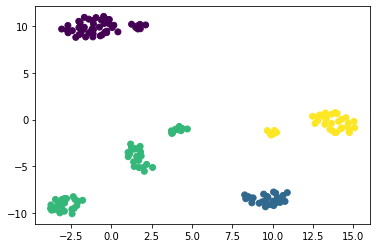



GMM with spherical covariance type and 6 components.
The silhoutte score of the GMM solution: 0.7112341523170471


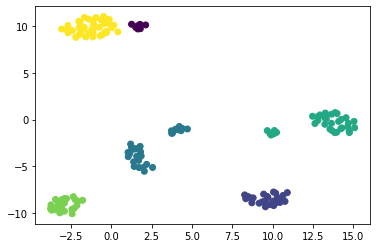



GMM with spherical covariance type and 8 components.
The silhoutte score of the GMM solution: 0.7043986320495605


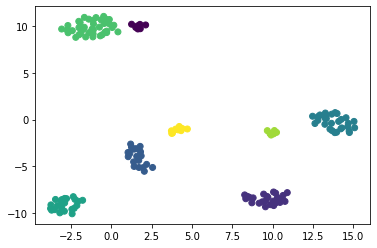

In [99]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 4, 6, 8]

for c_type in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(umap_results)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
        plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
        plt.show()
        print('\n')

# The Findings

All models performed best with components found with the dimensionality reduction technique UMAP, indicating that the global structure of the data in this case is more important than minimizing the divergence between the distributions of the data in its original dimension and it's low-dimension representation. In particular, K-means had the highest silhouette score 0.80, indicating to me that there likely isn't a clean split with the data and that the clusters are rather circular. PCA did not provide satisfactory clusters during the visualization aspect, and this carried over into the clustering portion - none of the models faired well using features garnered from PCA.

## K-Means
This model performed well While all other models performed best with four clusters, K-means performed best with six. This strikes me as odd - perhaps it's picking up different similarities than the other clustering techniques?

## Agglomerative 
The Agglomerative model performed slightly better with UMAP than t-SNE with four clusters and either complete linkage or average linkage - this tells me that the longest distance between the points in these clusters is also the average distance. To me, this is counter-intuitive to the fact that K-means did so well because it indicates that the clusters are far apart (though I suppose this doesn't necessarily mean that they're distinct).

## DBSCAN
The DBSCAN model did nearly as well with the UMAP components as K-means. As the maximum distance between two samples of a single neighborhood increased (ie, as the allowance of the size of an individual cluster increased), the performance of the model did as well. This reinforced my takings from the Agglomerative cluster, that the data is quite spread apart.

## GMM
Again, GMM performed best with four clusters, regardless of covariance type. I didn't find this model provided any additional information, but seeing yet another model perform best with four clusters reinforced that this data clusters nicely into four portions.

## Final Thoughts
As most of the models clustered the data into four sections nicely, I would be curious to see if these clusters are somewhat indicative of level of development. I imagine the best way to do this would be to assign numbers of each cluster, add this variable in the data, and then use supervised learning (likely linear regression) to understand the new variable.